# Analysing Time Series Data

Contents
- 01 Importing libraries and data
- 02 Subsetting, wrangling and cleaning time series
- 03 Time series analysis : decompostion
- 04 Testing for stationarity 
- 05 Standardising time series data 


## 01 Importing libraries and data 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'//Users/amypalomino/Documents/June 22 Final Project/02 Data'

In [7]:
# Import dataframe 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Monthly_Temps.csv'),
                index_col = False)

## 02 Wrangling, subsetting and cleaning


In [8]:
df.head()

,Unnamed: 0,Area Code (FAO),Area,Element,Months,Year,Unit,Value,Month_No,Day,Date
0,0,2,Afghanistan,Temperature change,January,1970,°C,0.824,1,1,1970-01-01
1,1,2,Afghanistan,Temperature change,January,1971,°C,-1.465,1,1,1971-01-01
2,2,2,Afghanistan,Temperature change,January,1972,°C,-1.237,1,1,1972-01-01
3,3,2,Afghanistan,Temperature change,January,1973,°C,-2.871,1,1,1973-01-01
4,4,2,Afghanistan,Temperature change,January,1974,°C,-1.181,1,1,1974-01-01


In [11]:
df.tail()

,Area Code (FAO),Area,Element,Months,Year,Unit,Value,Month_No,Day,Date
141427,181,Zimbabwe,Temperature change,December,2017,°C,0.605,12,1,2017-12-01
141428,181,Zimbabwe,Temperature change,December,2018,°C,0.999,12,1,2018-12-01
141429,181,Zimbabwe,Temperature change,December,2019,°C,2.067,12,1,2019-12-01
141430,181,Zimbabwe,Temperature change,December,2020,°C,-0.543,12,1,2020-12-01
141431,181,Zimbabwe,Temperature change,December,2021,°C,0.342,12,1,2021-12-01


In [9]:
df = df.drop(columns = ['Unnamed: 0'])

## 02 Subsetting, wrangling and cleaning

In [10]:
df.dtypes

Area Code (FAO)      int64
Area                object
Element             object
Months              object
Year                 int64
Unit                object
Value              float64
Month_No             int64
Day                  int64
Date                object
dtype: object

In [12]:
# Check for mixed data types 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [13]:
# Check for missing values 
df.isnull().sum()

Area Code (FAO)    0
Area               0
Element            0
Months             0
Year               0
Unit               0
Value              0
Month_No           0
Day                0
Date               0
dtype: int64

In [14]:
#Check for duplicates 
df_dups = df[df.duplicated()]
df_dups

,Area Code (FAO),Area,Element,Months,Year,Unit,Value,Month_No,Day,Date


In [15]:
df.columns

Index(['Area Code (FAO)', 'Area', 'Element', 'Months', 'Year', 'Unit', 'Value',
       'Month_No', 'Day', 'Date'],
      dtype='object')

In [18]:
# Remove redundant columns
df_sub = df.drop(columns = ['Area Code (FAO)', 'Element', 'Months', 'Year', 'Unit', 
       'Month_No', 'Day'])

In [19]:
df_sub.shape

(141432, 3)

In [20]:
df_sub.head()

,Area,Value,Date
0,Afghanistan,0.824,1970-01-01
1,Afghanistan,-1.465,1971-01-01
2,Afghanistan,-1.237,1972-01-01
3,Afghanistan,-2.871,1973-01-01
4,Afghanistan,-1.181,1974-01-01


In [24]:
pd.options.display.max_rows= None

In [25]:
df_sub.groupby('Area').agg({'Value': ['min','max','mean','sum']})

Value                    \
                                                      min     max      mean   
Area                                                                          
Afghanistan                                        -7.674   4.942  0.628200   
Albania                                            -4.340   4.814  0.570646   
Algeria                                            -2.817   4.233  0.803561   
American Samoa                                     -0.960   2.069  0.438819   
Andorra                                            -4.541   5.612  0.829061   
Angola                                             -1.147   3.157  0.661579   
Anguilla                                           -1.030   2.375  0.473864   
Antarctica                                         -5.036   6.687  0.211490   
Antigua and Barbuda                                -1.137   2.587  0.443391   
Argentina                                          -2.486   2.982  0.355941   
Armenia                                            -4.574   5.633  1.092083   
Aruba                                              -1.380   2.856  0.436393   
Australia                                          -1.388   3.117  0.548806   
Austria                                            -5.207   5.623  0.935808   
Azerbaijan                                         -5.419   5.910  1.110183   
Bahamas                                            -3.376   3.582  0.554506   
Bahrain                                            -3.617   4.199  0.699947   
Bangladesh                                         -2.402   3.773  0.271189   
Barbados                                           -1.073   2.470  0.342038   
Belarus                                            -6.884   8.090  1.479486   
Belgium                                            -4.086   5.884  1.448095   
Belgium-Luxembourg                                 -6.356   5.113  0.402228   
Belize                                             -1.742   3.817  0.520107   
Benin                                              -1.917   2.250  0.685550   
Bhutan                                             -1.914   3.277  0.377638   
Bolivia (Plurinational State of)                   -2.121   3.204  0.423835   
Bosnia and Herzegovina                             -4.420   5.124  1.242169   
Botswana                                           -2.397   3.448  0.507763   
Brazil                                             -0.811   2.533  0.644075   
British Virgin Islands                             -0.856   2.163  0.493742   
Brunei Darussalam                                  -0.864   2.276  0.468175   
Bulgaria                                           -5.724   6.279  0.574723   
Burkina Faso                                       -2.405   3.132  0.705085   
Burundi                                            -2.561   3.657  0.316162   
Cabo Verde                                         -1.187   3.713  1.097652   
Cambodia                                           -1.829   2.799  0.507279   
Cameroon                                           -1.790   2.673  0.580633   
Canada                                             -6.322   7.012  0.776449   
Cayman Islands                                     -2.525   3.053  0.550622   
Central African Republic                           -2.440   3.791  0.567554   
Chad                                               -3.482   4.430  0.572753   
Channel Islands                                    -5.218   4.778  0.684450   
Chile                                              -1.459   1.783  0.259255   
China, Hong Kong SAR                               -3.342   6.085  0.456522   
China, Macao SAR                                   -3.342   6.085  0.456522   
China, Taiwan Province of                          -2.373   4.773  0.418470   
China, mainland                                    -2.744   4.347  0.660542   
Christmas Island                                   -1.210   1.834  0.193739   
Cocos (Keeling) Islands

In [26]:
# Create subset containing only USA data

df_USA = df_sub[df_sub['Area'] == 'United States of America']

I subset the data to USA becasue this is location in my main df that has seen the highest number of disasters over the last 50 years. There are 4 more countries, all within Asia that have also have high frequency occurances of disaster but for now I will focus on the USA only.

In [27]:
df_USA.shape

(624, 3)

In [28]:
df_USA.head(5)

,Area,Value,Date
133056,United States of America,-1.634,1970-01-01
133057,United States of America,-1.211,1971-01-01
133058,United States of America,-0.212,1972-01-01
133059,United States of America,-0.495,1973-01-01
133060,United States of America,0.536,1974-01-01


In [30]:
# Create subset of df_USA for use in time-series
df_USA_sub = df_USA.drop(columns = ['Area'])

In [31]:
df_USA_sub.head()

,Value,Date
133056,-1.634,1970-01-01
133057,-1.211,1971-01-01
133058,-0.212,1972-01-01
133059,-0.495,1973-01-01
133060,0.536,1974-01-01


In [33]:
# Set the "Date" column as the index

from datetime import datetime

df_USA_sub['datetime'] = pd.to_datetime(df_USA_sub['Date']) # Create a datetime column from "Date."
df_USA_sub = df_USA_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_USA_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_USA_sub.head()

,Value
datetime,
1970-01-01,-1.634
1971-01-01,-1.211
1972-01-01,-0.212
1973-01-01,-0.495
1974-01-01,0.536


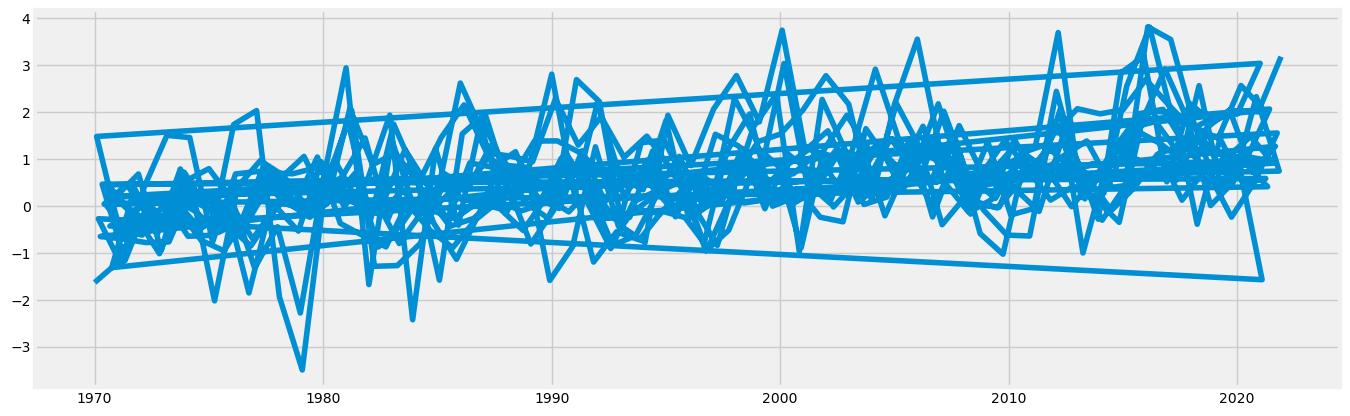

In [34]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_USA_sub)

In [35]:
# Sort the index 
df_USA_sub.sort_index(inplace = True)

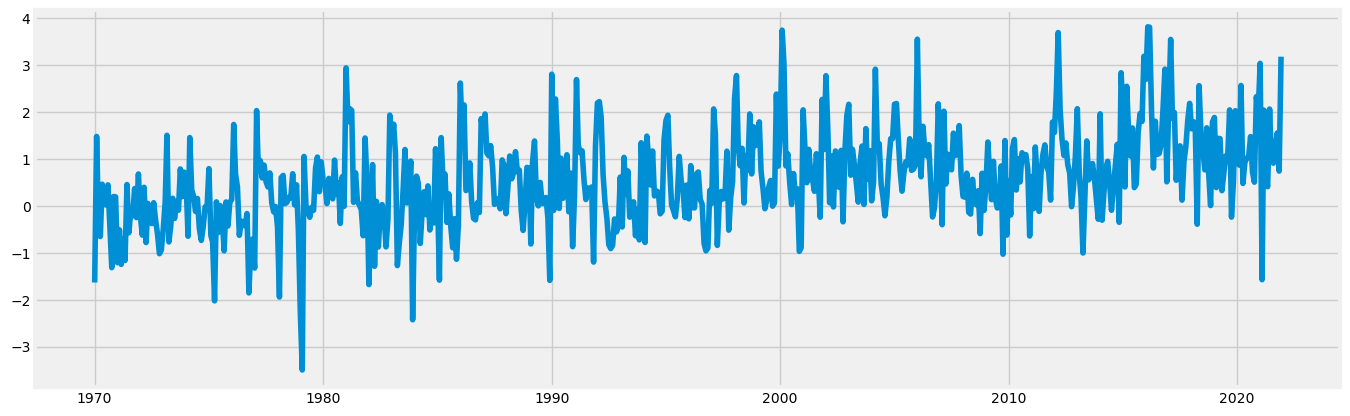

In [36]:
# Plot again with date ordered chronologically

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_USA_sub)

## 03 Time series analysis - Decomposition

In [37]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_USA_sub, model='additive')

In [38]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

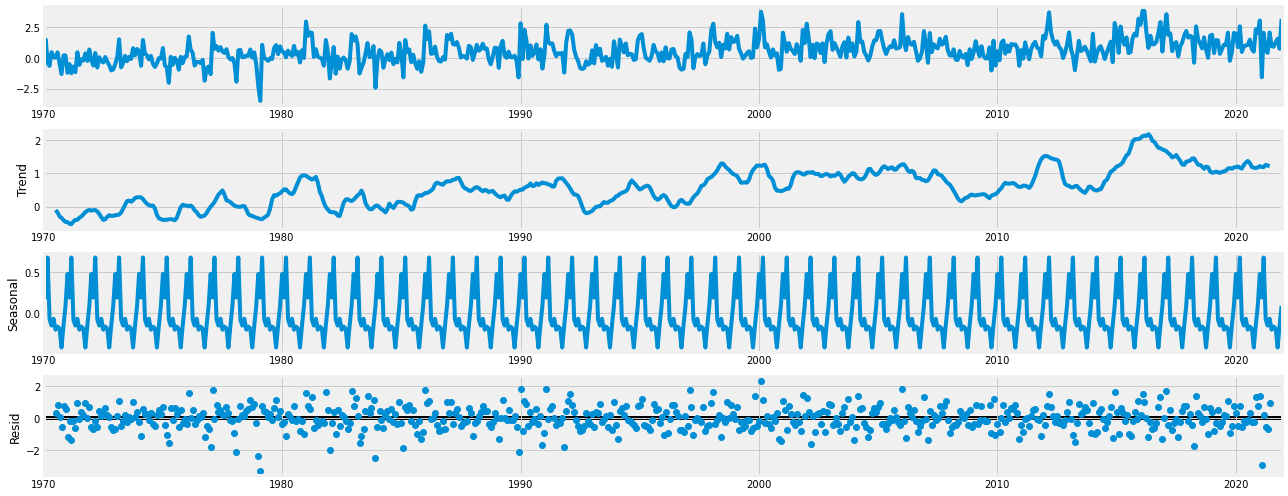

In [39]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend line does show an upward direction in temperature change in the USA over the last 50 years.It's easier to see here than in the level as there is so much noise distracting from this overall gradual trend.
The residual data is significant 

## 04 Testing for stationarity

In [40]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_USA_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.206883
p-value                          0.019590
Number of Lags Used             11.000000
Number of Observations Used    612.000000
Critical Value (1%)             -3.441080
Critical Value (5%)             -2.866274
Critical Value (10%)            -2.569291
dtype: float64


### Hypothesis  testing 
- Alternative hypothesis - Temperatures are rising over time

- Null hypothesis - Temperatures are not rising over time

What does the p-value tell me - the statistical test is significant as it's below 5%

When using the critical value of 5% (-2.86) the test statistic is smaller (-3.20), therefore I can reject my null hypothesis - temperatures are rising over time

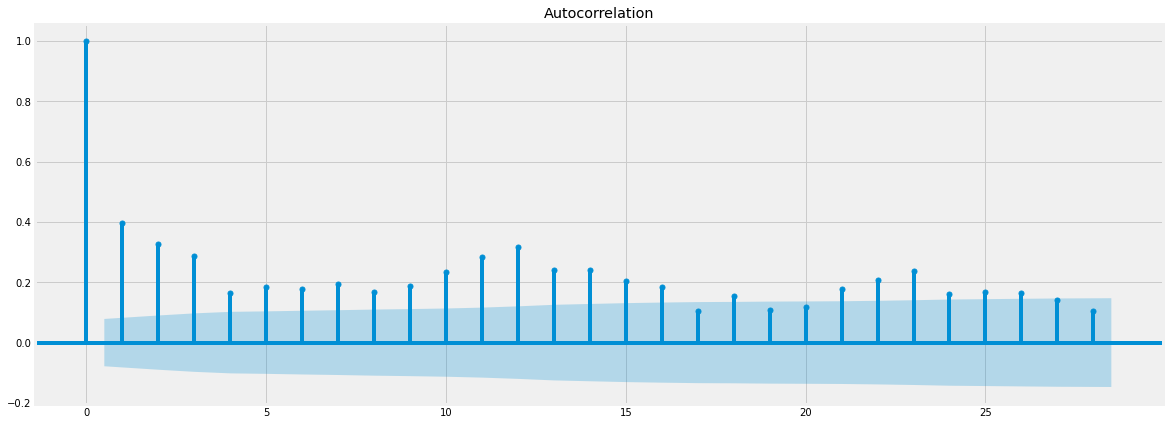

In [42]:
# Plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_USA_sub)
plt.show()

There are some significant lags in the data which indicates my data is non stationary.


## 05 Stationarising the data 

In [43]:
data_diff = df_USA_sub - df_USA_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
# Removing missing values 
data_diff.dropna(inplace = True)

In [45]:
data_diff.head()

,Value
datetime,
1970-02-01,3.113
1970-03-01,-1.753
1970-04-01,-0.379
1970-05-01,1.114
1970-06-01,-0.422


In [47]:
data_diff.columns

Index(['Value'], dtype='object')

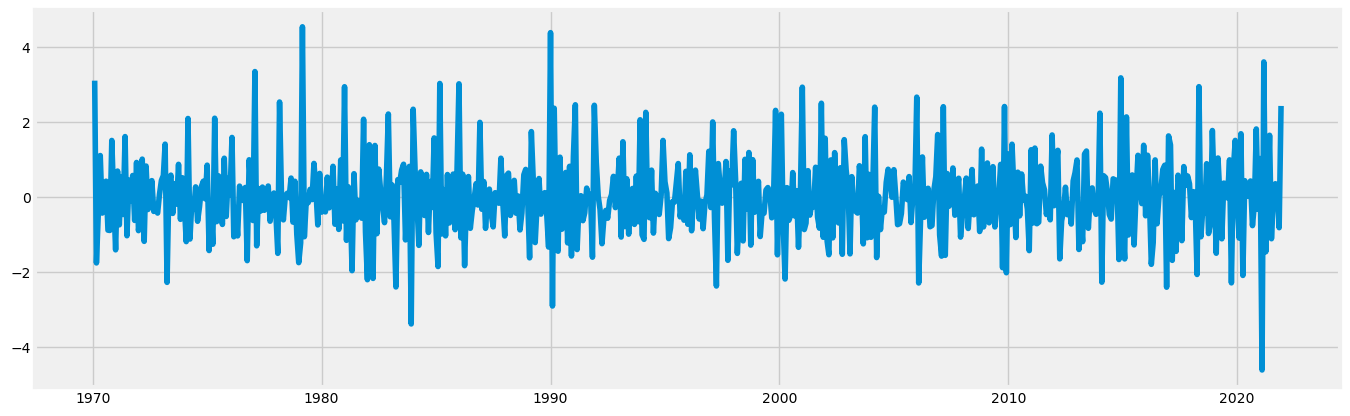

In [48]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.474337e+01
p-value                        2.550307e-27
Number of Lags Used            1.000000e+01
Number of Observations Used    6.120000e+02
Critical Value (1%)           -3.441080e+00
Critical Value (5%)           -2.866274e+00
Critical Value (10%)          -2.569291e+00
dtype: float64


The test statistic is much smaller than the critical value. 

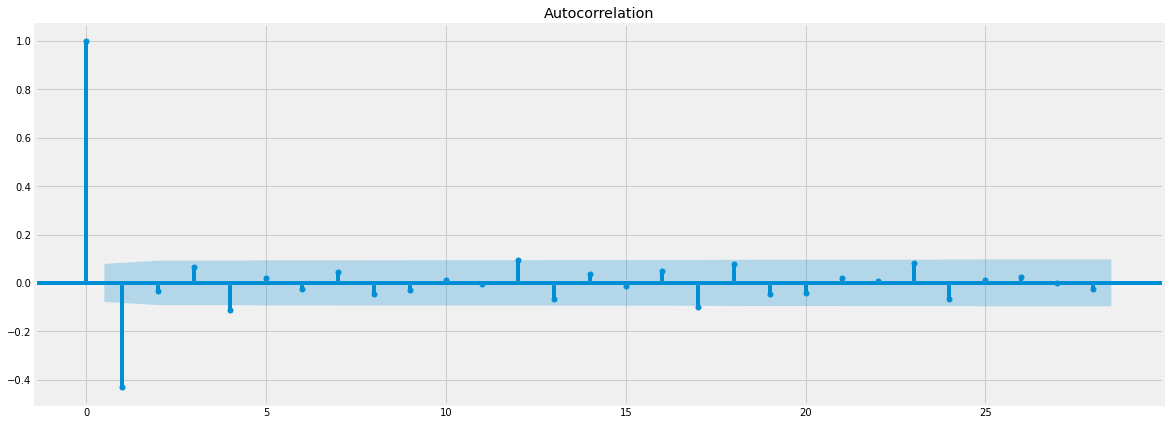

In [50]:
plot_acf(data_diff)
plt.show()

Conduct another round of differenceing to stationarise further

In [51]:
data_diff_2 = data_diff - data_diff.shift(1) 

In [52]:
# Removing missing values 
data_diff_2.dropna(inplace = True)

In [53]:
data_diff_2.head()

,Value
datetime,
1970-03-01,-4.866
1970-04-01,1.374
1970-05-01,1.493
1970-06-01,-1.536
1970-07-01,0.401


In [54]:
data_diff_2.columns

Index(['Value'], dtype='object')

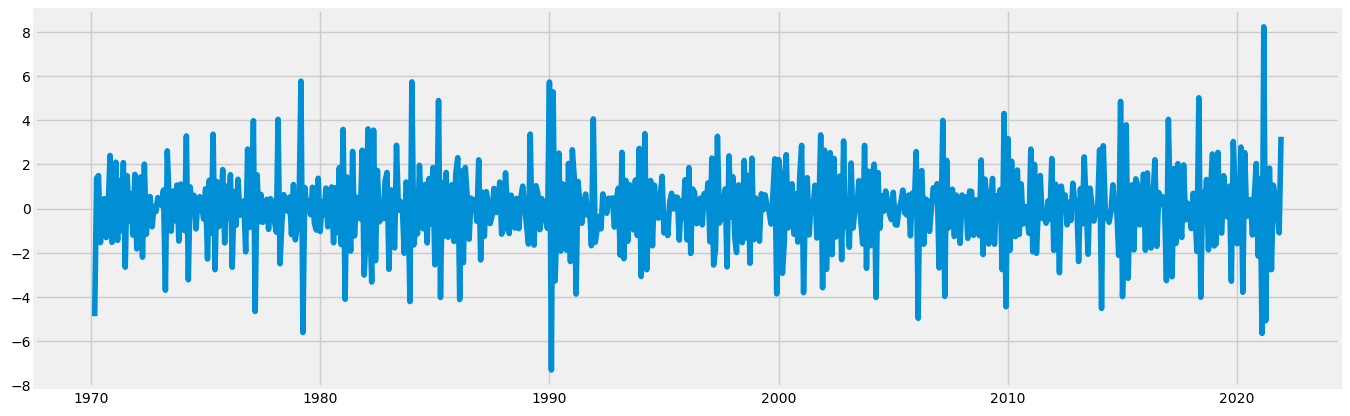

In [55]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [56]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.314688e+01
p-value                        1.392418e-24
Number of Lags Used            1.700000e+01
Number of Observations Used    6.040000e+02
Critical Value (1%)           -3.441223e+00
Critical Value (5%)           -2.866337e+00
Critical Value (10%)          -2.569325e+00
dtype: float64


The test statistic is now much smaller than the critical value. 

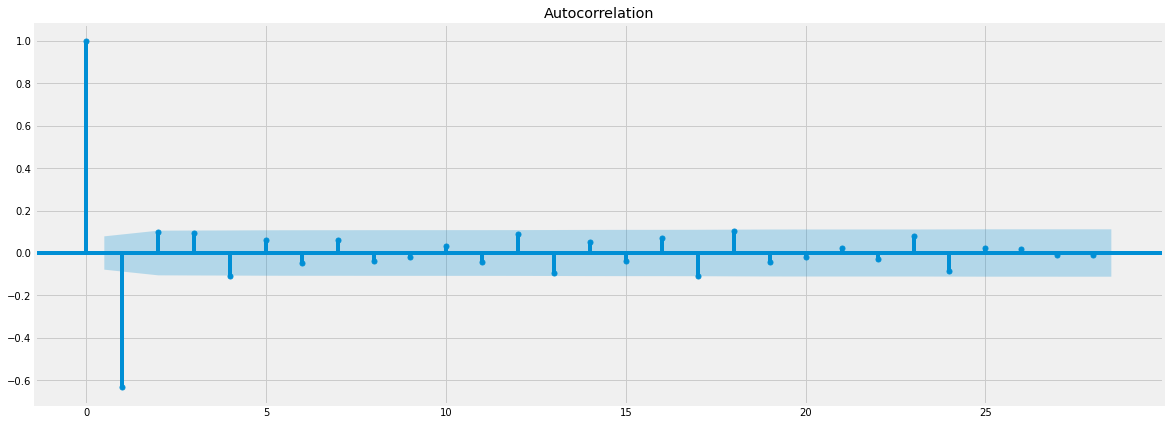

In [57]:
plot_acf(data_diff_2)
plt.show()

### The p-value was significant and the test statistic was much smaller than any of the critical values.

 I can confidently reject my null hypothesis, which confirms to me that temperatures in the USA are rising over time.